<a href="https://colab.research.google.com/github/nijapillai86/PCA_Unsupervised/blob/main/Capstone_Project_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df_finalConversion = pd.read_csv('/content/sample_data/Problem2_FInalConversions', sep='\t',names=['Timestamp', 'Userid', 'ProductCode','CartValue'])
df_finalConversion.head()

,Timestamp,Userid,ProductCode,CartValue
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [4]:
df_browingBehavior = pd.read_csv('/content/sample_data/Problem2_Site_BrowingBehavior', sep='\t',names=['Timestamp', 'Userid', 'Website_section_visited'])
df_browingBehavior.head()

,Timestamp,Userid,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [5]:
print("Browsing Behaviour shape :", df_browingBehavior.shape)
print("Final Conversion shape :", df_finalConversion.shape)

Browsing Behaviour shape : (253409, 3)
Final Conversion shape : (79795, 4)


In [6]:
df_browingBehavior.info()
df_finalConversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253409 entries, 0 to 253408
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                253409 non-null  object
 1   Userid                   253409 non-null  int64 
 2   Website_section_visited  253409 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    79795 non-null  object 
 1   Userid       79795 non-null  int64  
 2   ProductCode  79795 non-null  object 
 3   CartValue    79795 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [7]:
df_browingBehavior.Userid.unique()
df_browingBehavior.Userid.value_counts()

0                      118579
137223537287029747        120
2073684814437124290        87
877671478457643637         81
1317679380196114591        80
                        ...  
384811576342108875          1
636447528151751744          1
3935502783851291109         1
4410532445806110611         1
4281119533056523146         1
Name: Userid, Length: 24058, dtype: int64

In [8]:
df_browingBehavior.Website_section_visited.unique()
df_browingBehavior.Website_section_visited.value_counts()

product                     83251
product-listing-category    35070
home                        31942
content                     27742
default                     22603
iroa                        21660
cart                        17732
product-listing-search      10916
shoplive                     2035
productNotFound               256
product-listing-custom        140
signupcomplete                 56
mys                             5
product-listing-                1
Name: Website_section_visited, dtype: int64

In [9]:
df_finalConversion.ProductCode.value_counts()

K45766                                     6194
H211394                                    5168
H211370                                    4920
A293532                                    4798
H211397                                    1434
                                           ... 
H209634,H209088,H209079,H205929,H205929       1
H292911                                       1
H205246,J347433                               1
A281864                                       1
A239673,A282049                               1
Name: ProductCode, Length: 13066, dtype: int64

In [10]:
df_browingBehavior['isGuestUser'] = df_browingBehavior.Userid.apply(lambda x : x<=0)
df_browingBehavior.head()

,Timestamp,Userid,Website_section_visited,isGuestUser
0,2017-07-26 00:01:40.965,0,product,True
1,2017-07-26 00:03:18.448,0,product,True
2,2017-07-26 00:36:59.028,0,default,True
3,2017-07-26 00:41:17.273,0,product-listing-category,True
4,2017-07-26 00:45:39.197,0,content,True


In [11]:
df_browingBehavior['isGuestUser'].value_counts()

False    134830
True     118579
Name: isGuestUser, dtype: int64

In [12]:
 df_browingBehavior[df_browingBehavior['isGuestUser']==True].groupby('Website_section_visited')['Timestamp'].count().reset_index().rename({'Timestamp':'User_count'})

,Website_section_visited,Timestamp
0,cart,8164
1,content,12983
2,default,10773
3,home,14654
4,iroa,8739
5,product,40398
6,product-listing-category,16496
7,product-listing-custom,72
8,product-listing-search,5141
9,productNotFound,118


In [13]:
df_prodAnalysis= df_browingBehavior[df_browingBehavior['isGuestUser']==True].groupby('Website_section_visited')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'userCount'})
df_prodAnalysis['percentile']= df_prodAnalysis['userCount'].apply(lambda x:x/len(df_browingBehavior)*100)

In [14]:
df_prodAnalysis.head()

,Website_section_visited,userCount,percentile
0,cart,8164,3.221669
1,content,12983,5.123338
2,default,10773,4.251230
3,home,14654,5.782746
4,iroa,8739,3.448575


In [15]:
df_prodAnalysis = df_prodAnalysis.sort_values("userCount",ascending=False)
df_prodAnalysis.head(10)


,Website_section_visited,userCount,percentile
5,product,40398,15.941817
6,product-listing-category,16496,6.509635
3,home,14654,5.782746
1,content,12983,5.123338
2,default,10773,4.251230
4,iroa,8739,3.448575
0,cart,8164,3.221669
8,product-listing-search,5141,2.028736
10,shoplive,1019,0.402117
9,productNotFound,118,0.046565


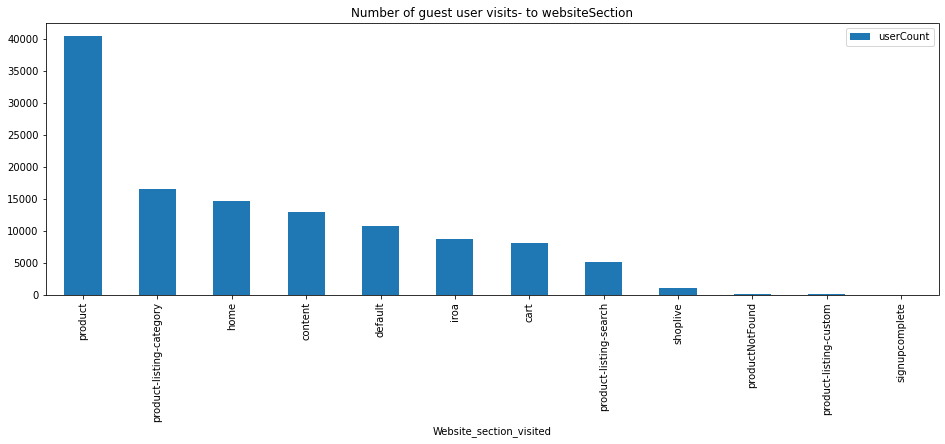

In [16]:
df_prodAnalysis.plot.bar(x="Website_section_visited", y="userCount", rot=90, title="Number of guest user visits- to websiteSection",figsize=(16,5));

In [17]:
df_finalConversion['isGuestUser'] = df_finalConversion.Userid.apply(lambda x : x<=0)
df_finalConversion.head()

,Timestamp,Userid,ProductCode,CartValue,isGuestUser
0,2017-07-26 00:00:10.465,0,A293532,52.14,True
1,2017-07-26 00:00:12.301,0,H209597,31.50,True
2,2017-07-26 00:00:12.388,0,H211370,30.48,True
3,2017-07-26 00:00:14.389,0,A282331,51.00,True
4,2017-07-26 00:00:16.837,0,H211410,16.74,True


In [18]:
df_finalConversion['isGuestUser'].value_counts()

False    59598
True     20197
Name: isGuestUser, dtype: int64

In [19]:
df_finalConversion.groupby('isGuestUser')['Timestamp'].count()

isGuestUser
False    59598
True     20197
Name: Timestamp, dtype: int64

In [20]:
df_guestAnalysis= df_finalConversion.groupby('isGuestUser')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'userCount'})
df_guestAnalysis['percentile']= df_guestAnalysis['userCount'].apply(lambda x:x/len(df_finalConversion)*100)

df_guestAnalysis.head()

,isGuestUser,userCount,percentile
0,False,59598,74.68889
1,True,20197,25.31111


,isGuestUser,userCount,percentile
0,False,59598,74.68889
1,True,20197,25.31111


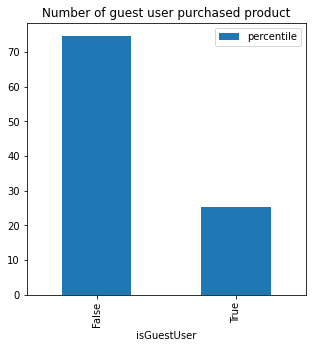

In [21]:
df_guestAnalysis.plot.bar(x="isGuestUser", y="percentile", rot=90, title="Number of guest user purchased product",figsize=(5,5));


df_guestAnalysis.head()

https://datacarpentry.org/python-ecology-lesson/05-merging-data/

In [ ]:
merged_inner = pd.merge(left=df_browingBehavior, right=df_finalConversion, left_on='isGuestUser', right_on='isGuestUser')
print(merged_inner.shape)
merged_inner